Código para Análise de Sinais

Faz o upload do dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset_trabest.csv to dataset_trabest.csv


Importa Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

Cria um dataframe utilizando o dataset e plota uma figura com o mesmo

In [ ]:
data = pd.read_csv('dataset_trabest.csv')

In [ ]:
plt.figure(figsize=[20,6])
data.head()

,T1,T1 - Luz,T2,T2 - Luz,T3,T3 - Luz,T4,T4 - Luz
0,80.5,56.5,75.4,49.2,33.5,30.4,26.2,18.9
1,88.3,56.7,75.5,57.6,34.6,29.3,26.2,20.9
2,91.2,68.2,75.6,59.8,34.6,29.3,27.3,22.0
3,92.3,77.6,75.7,66.0,34.6,29.4,29.4,21.0
4,92.3,80.7,75.8,64.9,36.7,29.3,29.4,23.1


<Figure size 1440x432 with 0 Axes>

Aplica a função zscore, com critério z<3, no dataset para filtrar outliers.

In [ ]:
zdata = data.apply(zscore)
data[(np.abs(zdata) < 3)]

,T1,T1 - Luz,T2,T2 - Luz,T3,T3 - Luz,T4,T4 - Luz
0,NaN,NaN,75.4,NaN,33.5,30.4,NaN,NaN
1,NaN,NaN,75.5,57.6,34.6,29.3,NaN,NaN
2,91.2,NaN,75.6,59.8,34.6,29.3,NaN,NaN
3,92.3,NaN,75.7,66.0,34.6,29.4,29.4,NaN
4,92.3,NaN,75.8,64.9,36.7,29.3,29.4,NaN
...,...,...,...,...,...,...,...,...
595,94.4,89.2,77.6,59.7,35.7,31.4,28.4,27.3
596,93.3,89.1,77.6,60.9,34.6,31.5,29.3,29.3
597,93.3,88.1,77.6,60.7,35.6,30.4,29.4,28.3
598,94.4,89.2,75.4,57.7,34.6,29.4,29.4,28.3


Esse trecho é um exemplo, mostrando um trecho do sinal antes e depois do filtro.

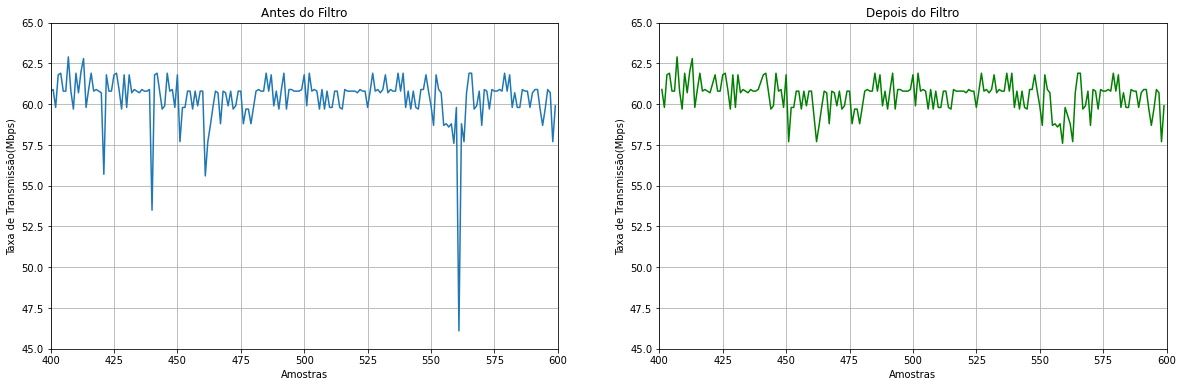

In [ ]:
psinal = data['T2 - Luz']
fpsinal = data['T2 - Luz'][(np.abs(zdata['T2 - Luz']) < 3)] 
fig, [ax1,ax2] = plt.subplots(1,2,figsize=[20,6])
ax1.plot(psinal[400:])
ax1.set_xlim(400,600)
ax1.set_ylim(45,65)
ax1.set_xlabel('Amostras')
ax1.set_ylabel('Taxa de Transmissão(Mbps)')
ax1.set_title('Antes do Filtro')
ax1.grid()
ax2.plot(fpsinal[400:], 'g')
ax2.set_xlim(400,600)
ax2.set_ylim(45,65)
ax2.set_xlabel('Amostras')
ax2.set_ylabel('Taxa de Transmissão(Mbps)')
ax2.set_title('Depois do Filtro')
ax2.grid()

Mostra as amostras de cada conjunto que foram rejeitadas e plota um histograma.

In [ ]:
barras = []
for nome in data:
  barras.append(len(data[nome][(np.abs(zdata[nome]) > 3)]))
  print(data[nome][(np.abs(zdata[nome]) > 3)])
  print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')

0      80.5
1      88.3
337    80.7
338    81.8
353    89.1
439    89.1
Name: T1, dtype: float64
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
0    56.5
1    56.7
2    68.2
3    77.6
4    80.7
6    79.7
7    81.8
Name: T1 - Luz, dtype: float64
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
10     70.3
42     72.3
72     72.3
88     72.3
196    72.4
201    72.3
238    72.4
272    65.0
522    59.8
Name: T2, dtype: float64
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
0      49.2
421    55.7
440    53.5
461    55.6
561    46.1
Name: T2 - Luz, dtype: float64
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
559    27.3
560    29.3
561    28.3
562    28.3
563    28.3
564    28.3
565    29.3
566    27.3
567    29.4
568    28.3
569    28.3
570    29.4
571    29.3
572    29.4
573    27.3
574    29.4
575    29.4
576    29.3
577    28.3
578    29.4
579    29.3
Name: T3, dtype: float64
%%%%%%%%%%%%%%%%%%%%%%%%%

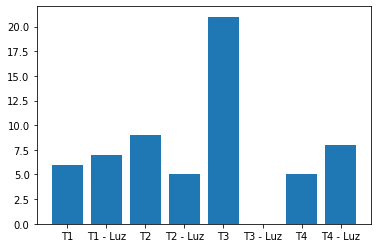

In [ ]:
ax = plt.bar(['T1', 'T1 - Luz', 'T2', 'T2 - Luz', 'T3', 'T3 - Luz', 'T4', 'T4 - Luz'],height=barras)

In [ ]:
Funções que calculam autocorrelação e densidade espectral de potência.

In [ ]:
from scipy import signal
def geraR(dados, nome):
  R = []
  for i in range(40): # caso se queira alterar o número de lags, basta alterar esse valor
    R.append(dados.autocorr(lag=i))
  plt.figure(figsize=[20,6])
  plt.title(nome)
  plt.stem(R)
  return R

def psd(R, nome):
  a, b = signal.freqz(R, 1)
  plt.figure(figsize=[10,5])
  plt.title('PSD '+nome)
  plt.xlabel('Frequência(rad/s)')
  plt.ylabel('Amplitude')
  plt.plot(a, b)
  plt.grid()
  plt.xlim(np.amin(a),np.amax(a))
  return a,b

Gráficos de autocorrelação.

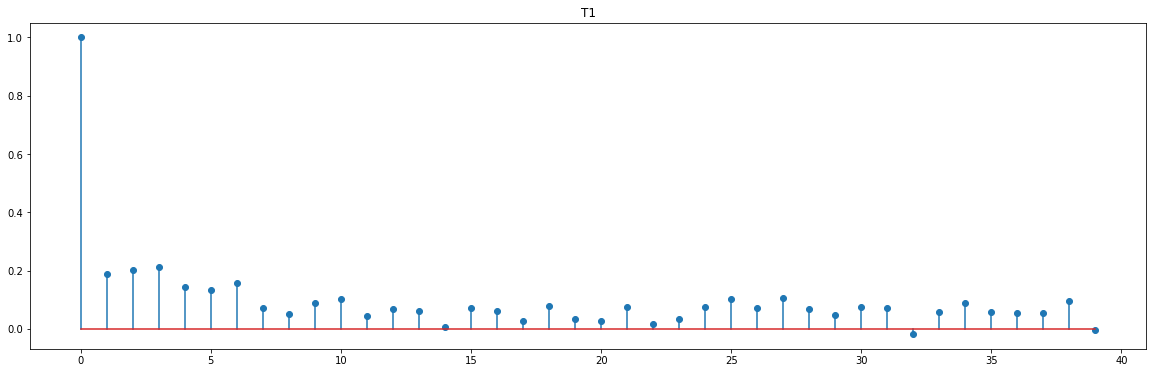

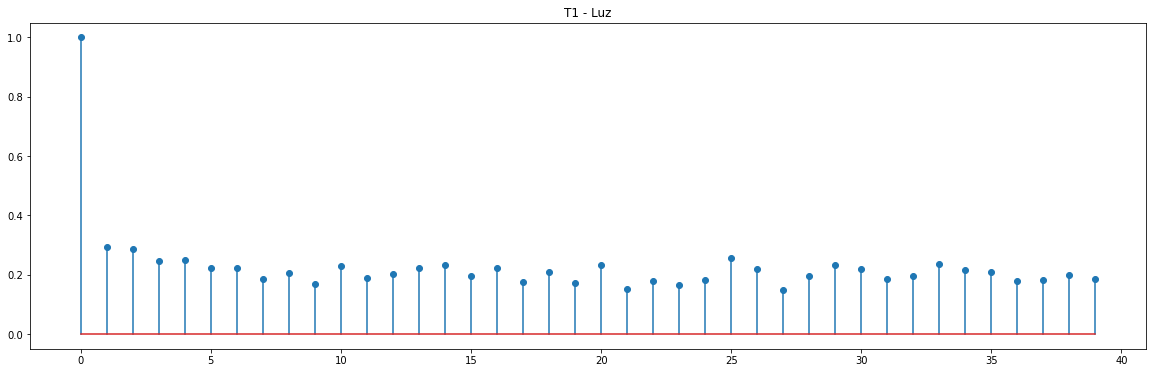

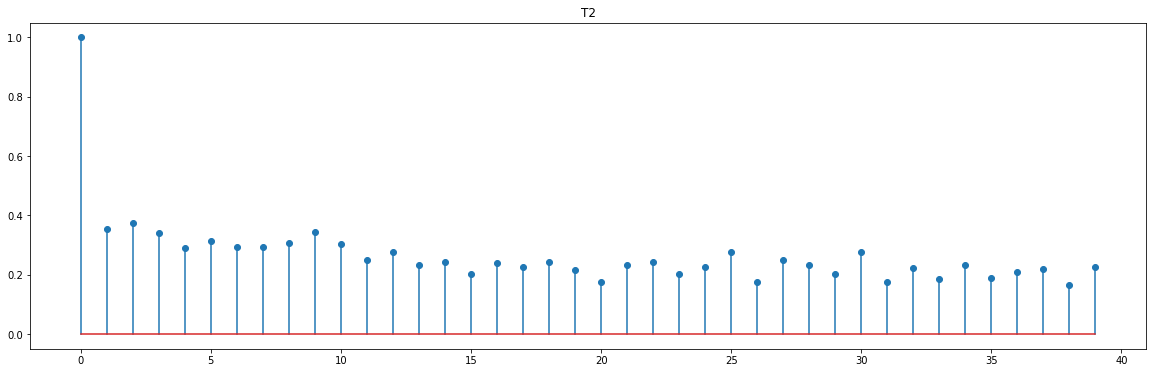

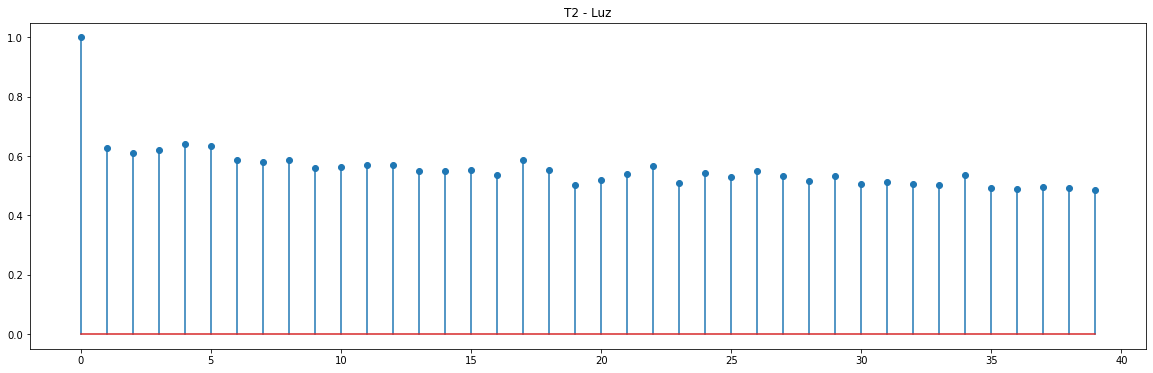

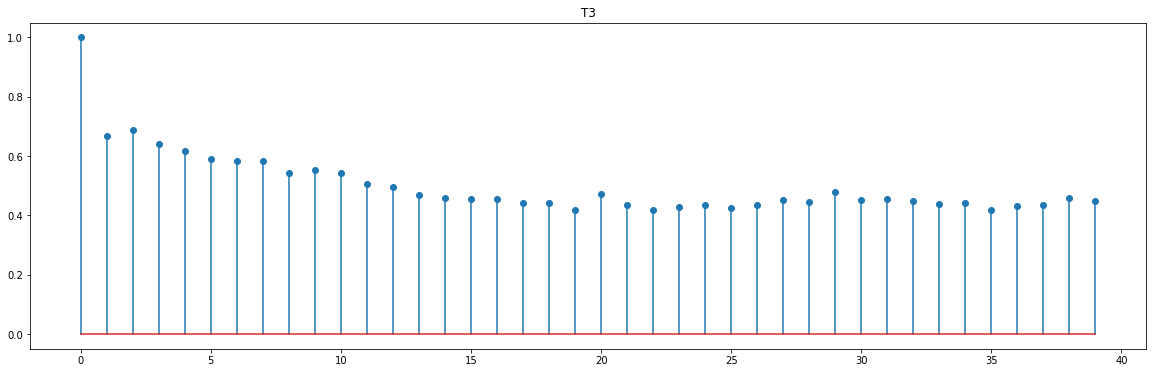

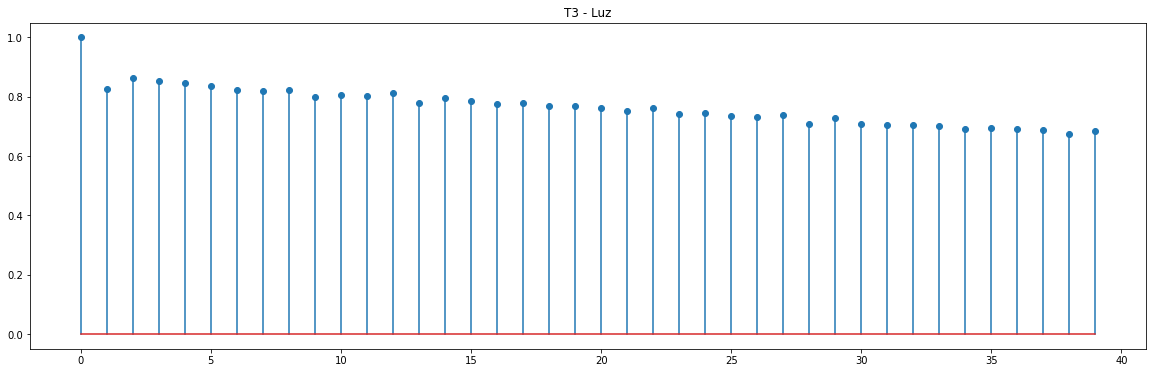

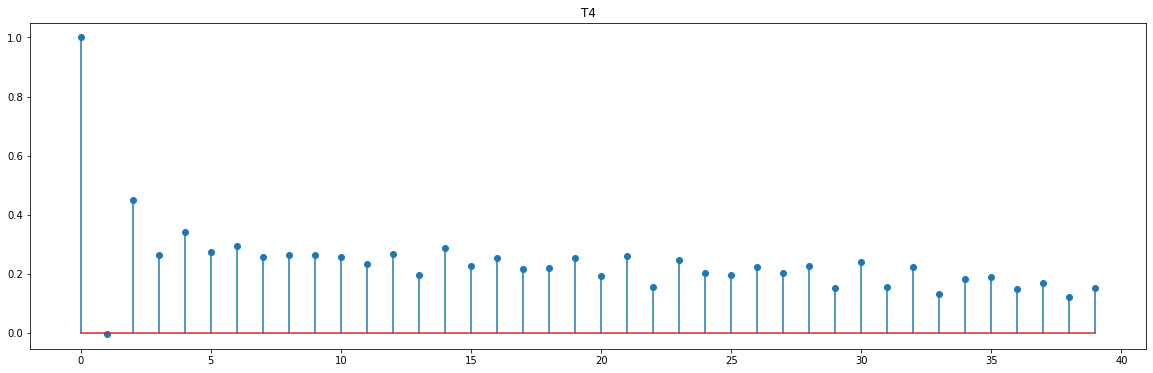

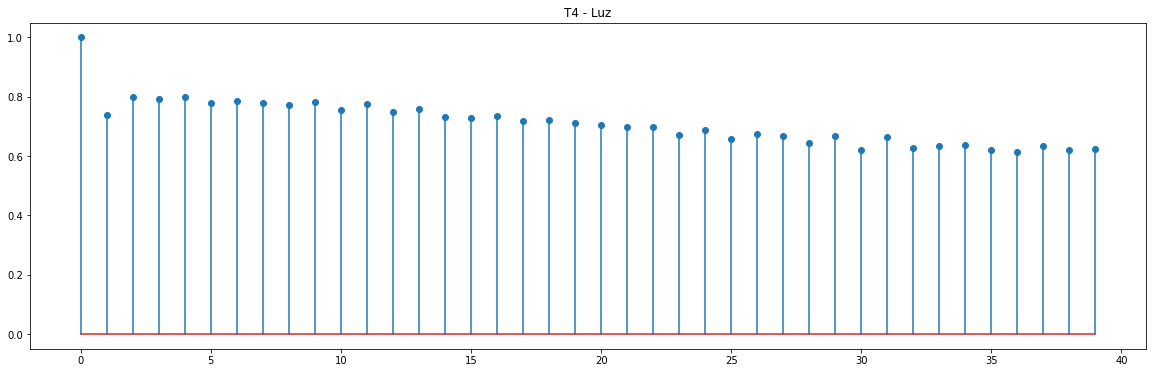

In [ ]:
R = []
for nom in data:
  R.append(geraR(data[nom][(np.abs(zdata[nom]) < 3)], nom))

Gráficos de densidade espectral de potência.

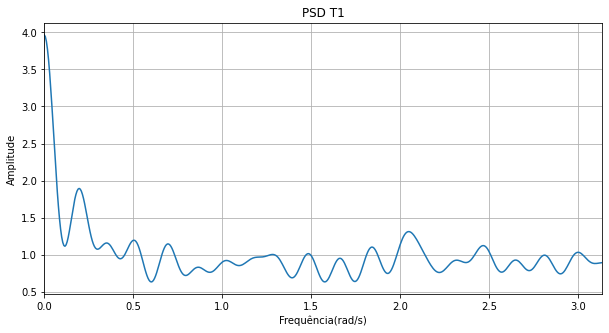

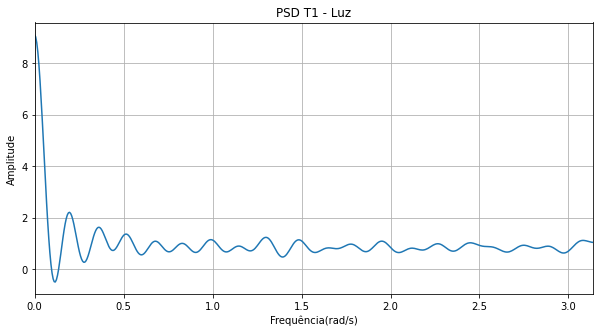

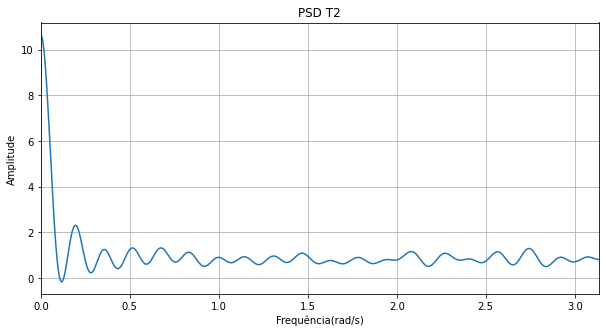

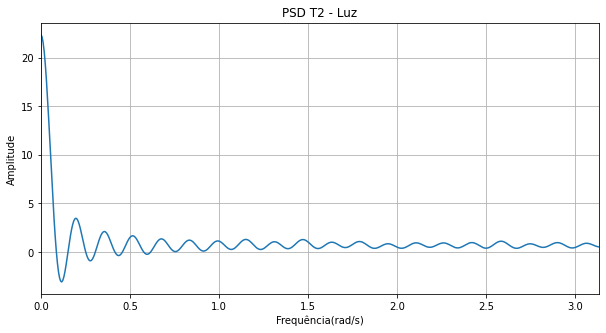

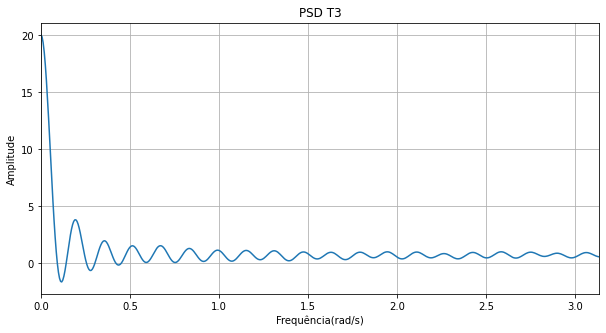

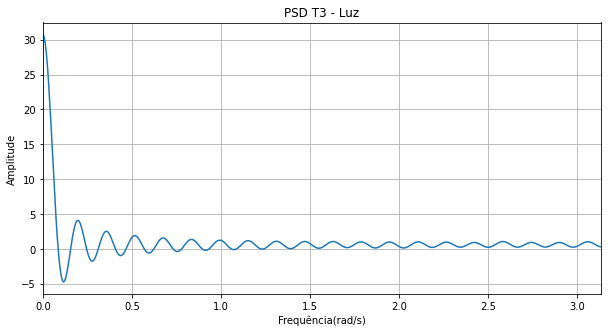

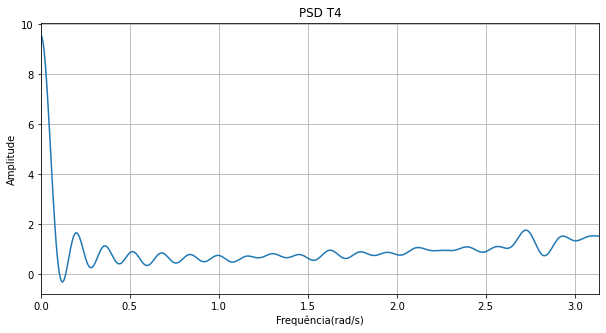

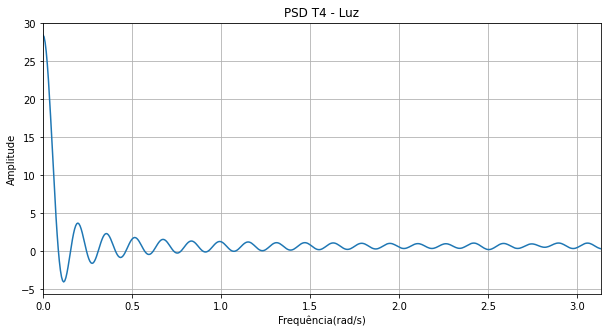

In [ ]:
nome = ['T1','T1 - Luz','T2','T2 - Luz','T3','T3 - Luz','T4','T4 - Luz']
for Rx in R:
  psd(Rx, nome[R.index(Rx)])

Forma alternativa para o cálcula da autocorrelação. A vantagem dessa função é plotar a região azul de não confiança.

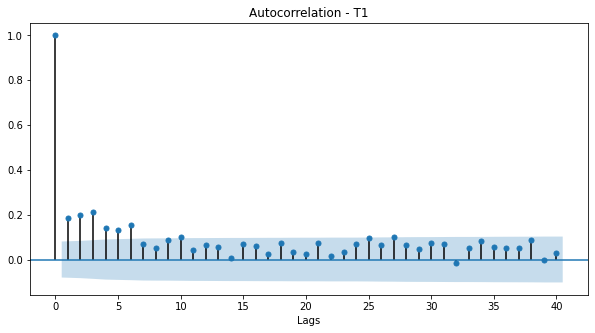

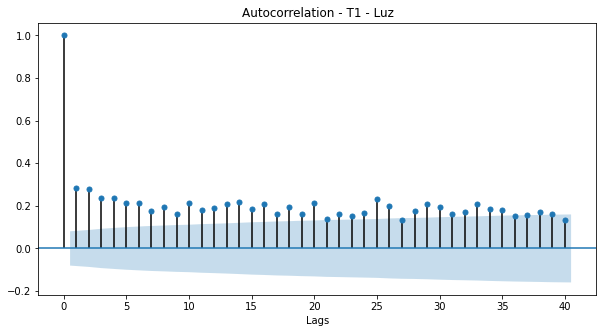

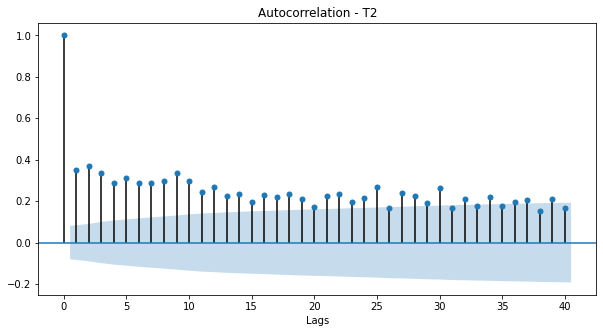

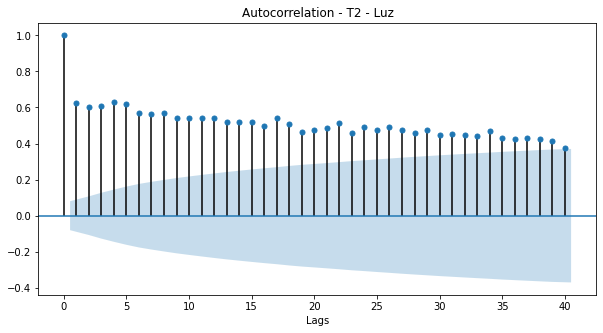

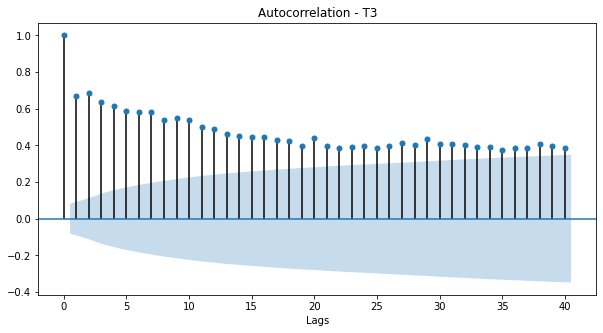

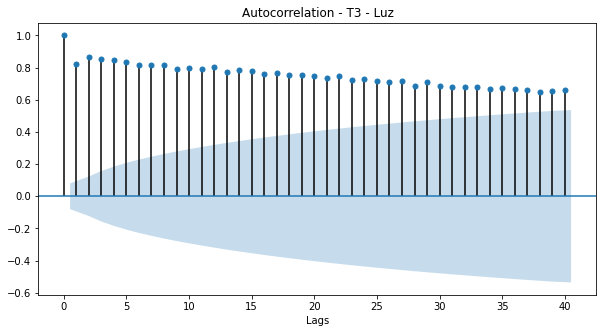

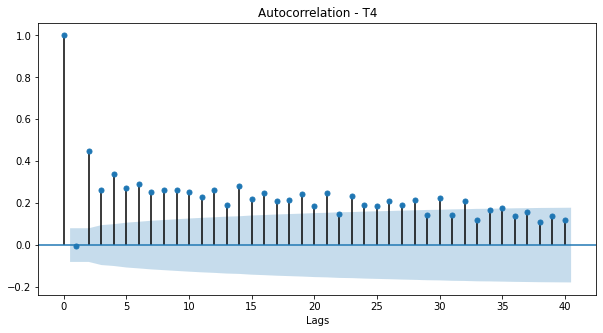

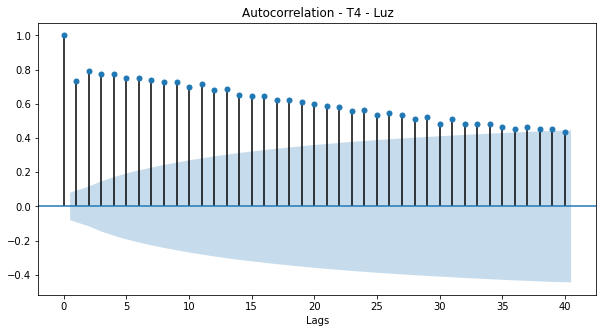

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
for nome in data:
  fig, ax = plt.subplots(figsize=(10, 5))
  ax.set_xlabel('Lags')
  title = 'Autocorrelation - '+nome
  plot_acf(data[nome][(np.abs(zdata[nome]) < 3)], lags=40, ax=ax, title=title) 
  plt.show()

Teste de estacionaridade Dickey-Fuller Aumentado.

In [ ]:
# Import adfuller
from statsmodels.tsa.stattools import adfuller
for nome in data:
  result = adfuller(data[nome][(np.abs(zdata[nome]) < 3)], maxlag=None)
  print(nome)
  print('Lags: ', result[2])
  print('p-value: %.2f' % result[1])
  print('%%%%%%%%%%%%%%%%')

T1
Lags:  5
p-value: 0.00
%%%%%%%%%%%%%%%%
T1 - Luz
Lags:  13
p-value: 0.03
%%%%%%%%%%%%%%%%
T2
Lags:  9
p-value: 0.01
%%%%%%%%%%%%%%%%
T2 - Luz
Lags:  18
p-value: 0.23
%%%%%%%%%%%%%%%%
T3
Lags:  6
p-value: 0.03
%%%%%%%%%%%%%%%%
T3 - Luz
Lags:  11
p-value: 0.66
%%%%%%%%%%%%%%%%
T4
Lags:  5
p-value: 0.00
%%%%%%%%%%%%%%%%
T4 - Luz
Lags:  8
p-value: 0.02
%%%%%%%%%%%%%%%%


Teste de estacionaridade Kwiatkowski–Phillips–Schmidt–Shin (KPSS).

In [ ]:
from statsmodels.tsa.stattools import kpss
for nome in data:
  result = kpss(data[nome][(np.abs(zdata[nome]) < 3)])
  print(nome)
  print('p-value: %.2f' % result[1])
  print('%%%%%%%%%%%%%%%')

T1
p-value: 0.05
%%%%%%%%%%%%%%%
T1 - Luz
p-value: 0.01
%%%%%%%%%%%%%%%
T2
p-value: 0.01
%%%%%%%%%%%%%%%
T2 - Luz
p-value: 0.01
%%%%%%%%%%%%%%%
T3
p-value: 0.01
%%%%%%%%%%%%%%%
T3 - Luz
p-value: 0.01
%%%%%%%%%%%%%%%
T4
p-value: 0.01
%%%%%%%%%%%%%%%
T4 - Luz
p-value: 0.01
%%%%%%%%%%%%%%%


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than 